In [1]:
## Camel (C)Up

import random
import copy
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# 1-3 dice roll function
def dice_roll():
    Output = random.randint(1, 3)
    return Output

In [3]:
class camel:
    # define the camel object
    #    - stores all important info about a single camel
    
    def __init__(self, color):
        # which camel is directly above the current camel; -1 for none
        self.camel_above = -1
        # which camel is directly below the current camel; -1 for none
        self.camel_below = -1
        # where is the current camel on the board
        self.square = 0
        # camel color
        self.color = color
        

def move_camel_to(curr_camel_ind, new_square, all_camels):
    curr_camel = all_camels[curr_camel_ind]
    # if there is a camel on that square below curr_camel, change it to top...aka remove camel_above for camel below curr_camel
    for i,camel in enumerate(all_camels):
        if (camel.square == curr_camel.square) and (camel.camel_above == curr_camel_ind):
            # remove any camel above i.e. change below camel to new top
            all_camels[i].camel_above = -1
            # change current camel to new bottom
            all_camels[curr_camel_ind].camel_below = -1
            

    # if a camel is already in the space, put this camel above it
    for i,camel in enumerate(all_camels):
        if (camel.square == new_square) and (camel.camel_above == -1) and (i != curr_camel_ind):
            all_camels[i].camel_above = curr_camel_ind
            all_camels[curr_camel_ind].camel_below = i
            
    # move the current camel forward
    curr_camel.square = new_square
    
    # move the board position of all respective camels above
    camel_ontop = curr_camel.camel_above
    while camel_ontop != -1:
        all_camels[camel_ontop].square = new_square
        camel_ontop = all_camels[camel_ontop].camel_above

    # return new camel states
    return all_camels

def print_camel_states(all_camels):
    print("Color", '\t', "Loc", '\t', "Above", '\t', "Below")
    for camel in all_camels:
        print(camel.color, '\t', camel.square, '\t', camel.camel_above, '\t', camel.camel_below)
    print()
    

def clear_board():
    all_camels = []
    for color in ['orange', 'blue', 'green', 'yellow', 'white']:
        all_camels.append(camel(color))
#    print_camel_states(all_camels)
    return all_camels

# recursive function that places the camel and then calls to place the camel above
# will only run on bottom camels due to print_board function
def place_camel_and_above(camel_ind, all_camels, board):
    # place the current camel
    board[all_camels[camel_ind].square].append(all_camels[camel_ind].color)
    # move pointer to camel above
    camel_above_ind = all_camels[camel_ind].camel_above
    # if this camel is the top, return the board
    if camel_above_ind == -1:
        return board
    # if there is a camel above call the function on the camel above current
    else:
        board = place_camel_and_above(camel_above_ind, all_camels, board)
    return board
    

def print_board(all_camels):
    # initialize the board
    board  = [[] for i in range(20)]
    # list over camels
    for camel_ind,camel in enumerate(all_camels):
        if camel.camel_below == -1:
            # if the camel is at the bottom of the stack, call the function to place the rest of the stack
            board = place_camel_and_above(camel_ind, all_camels, board)
    # right is top
    print(' - start - ')
    [print(square) for square in board]
    print(' - finish - ')

In [4]:
def determine_standings(all_camels):
    board  = [[] for i in range(20)]
    # list over camels
    for camel_ind,camel in enumerate(all_camels):
        if camel.camel_below == -1:
            # if the camel is at the bottom of the stack, call the function to place the rest of the stack
            board = place_camel_and_above(camel_ind, all_camels, board)
    standings = [camel for square in board for camel in square]
    return(standings)

# Starting positions
# initialize board
def start_game(all_camels):
    all_camels = clear_board()
    run_leg(all_camels)
    return all_camels
            

In [14]:
#NEED TO FIX THIS UP SO IT STOPS PROPERLY AND ERRORS PROPERLY

def run_leg(all_camels):
    remaining_camels = [0,1,2,3,4]
    random.shuffle(remaining_camels)
    
    for i in range(5):
        camel_choice = remaining_camels.pop()
        all_camels = move_camel_to(camel_choice,all_camels[camel_choice].square + dice_roll(),all_camels)
    
    # WIP - ADD CHECK IF GAME IS OVER AND END
    #if all_camels[camel_choice].square > 16:
    #        print("Game Over")
    #        break
            # insert logic here to output order of winners/losers
        
    # for debugging
    #print_board(all_camels)
    return all_camels

def run_n_legs(orig_camel_state, n):
    all_standings = []
    for i in range(n):
        all_standings.append(determine_standings(run_leg(copy.deepcopy(orig_camel_state))))
        print_board(orig_camel_state)
    return all_standings

In [19]:
def tally_placements(all_standings):
    placements_dict = [{'orange' : 0, 'blue' : 0, 'yellow' : 0, 'white' : 0, 'green' : 0} for rank in range(5)]
    for leg in all_standings:
        for rank,color in enumerate(leg):
            placements_dict[rank][color] += 1
    return pd.DataFrame(placements_dict, index=['5','4','3','2','1'])
    

In [20]:
# initalizes all_camels as a variable
camel_state = clear_board()
camel_state = start_game(camel_state)
print_board(camel_state)

 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 


In [24]:
num_runs = 1000
all_standings = run_n_legs(camel_state, num_runs)
placement_dict = 100.0*tally_placements(all_standings)/num_runs

 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]

['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 

[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'yellow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
 - finish - 
 - start - 
[]
['white', 'blue', 'orange']
['green', 'ye

In [25]:
placement_dict

,blue,green,orange,white,yellow
5,17.5,18.2,13.0,37.9,13.4
4,17.7,25.4,15.4,24.3,17.2
3,21.4,25.3,16.8,14.7,21.8
2,23.4,17.7,22.1,11.8,25.0
1,20.0,13.4,32.7,11.3,22.6


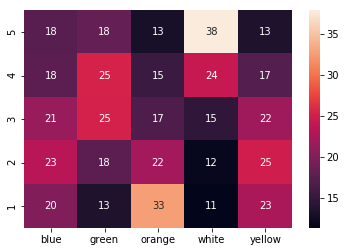

In [26]:
sns.heatmap(placement_dict, annot=True)

In [ ]:
print_board(all_camels)

In [ ]:
all_camels = run_leg(all_camels)

In [ ]:
print_camel_states(all_camels)

In [ ]:
all_camels = move_camel_to(0,2,all_camels)

In [ ]:
print_camel_states(all_camels)

In [ ]:
all_camels = move_camel_to(1,2,all_camels)

In [ ]:
all_camels = move_camel_to(3,2,all_camels)

In [ ]:
all_camels = move_camel_to(2,2,all_camels)

In [ ]:
all_camels = move_camel_to(4,2,all_camels)

In [ ]:
all_camels = move_camel_to(3,3,all_camels)

In [ ]:
all_camels = move_camel_to(1,4,all_camels)

In [ ]:
all_camels = move_camel_to(3,4,all_camels)

In [ ]:
print_board(all_camels)